In [1]:
# Ques1-load a file 

import pandas as pd

df=pd.read_csv('/Users/kanchan/Downloads/Titanic_original.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [6]:
df['Age'].min()

0.42

In [7]:
df['Age'].max()

80.0

In [8]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
df['Age'] = pd.cut(df['Age'], bins = bins, labels=labels)

In [9]:
pd.DataFrame(df['Age'].value_counts())

,count
Age,
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [10]:
df['Age'].mode()[0]


'Adult'

In [11]:
df = df.fillna({'Age' : df['Age'].mode()[0]})

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
df[df['Embarked'] == 'S'].shape[0]

644

In [14]:
df[df['Embarked'] == 'C'].shape[0]

168

In [15]:
df[df['Embarked'] == 'Q'].shape[0]

77

In [16]:
df = df.fillna({'Embarked' : 'S'})

In [17]:
df[['Pclass', 'Survived']].groupby(['Pclass']).sum().sort_values(by='Survived')

,Survived
Pclass,
2,87
3,119
1,136


In [18]:
df[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by='Survived')

,Survived
Sex,
male,109
female,233


In [19]:
#bins = [-1, 7.9104, 14.4542, 31, 512.330]
#labels = ['low’, 'mediumlow', 'medium’, 'high’]
#df[’Fare’] = pd.cut(df["fare"], bins = bins, labels = labels)

bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels =['low','mid-low','medium','high']
df['Fare'] = pd.cut(df['Fare'], bins = bins, labels = labels)



In [20]:
df['Fare']

0          low
1         high
2      mid-low
3         high
4      mid-low
        ...   
886    mid-low
887     medium
888     medium
889     medium
890        low
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['low' < 'mid-low' < 'medium' < 'high']

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
#3.	Select features that can be predictive of the survival status
#df_P=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin']]

df.columns
Pred_feat=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

In [24]:
c=['PassengerId','Name','Ticket','Cabin']

In [25]:
#4.	Drop features that you think are not predictive 
df=df.drop(c,axis=1)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
#5.	Transform selected categorical features with Dummy values 
dummies = ['Fare','Age', 'Embarked', 'Sex']
dummy_data = pd.get_dummies(df[dummies])

In [28]:
dummy_data.shape

(891, 14)

In [29]:
df_n = pd.concat([df, dummy_data], axis = 1)
df_n.drop(dummies, axis=1, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [31]:
X = df_n.drop('Survived', axis = 1)
y = df_n['Survived']


In [32]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [33]:
logistic = LogisticRegression()

In [34]:
grid_search = GridSearchCV(logistic, param_grid, cv=5)

In [35]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [36]:
grid_search.best_params_

{'C': 1}

In [37]:
grid_search2 = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

In [38]:
grid_search2.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [39]:
grid_search.best_params_

{'C': 1}

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
l1_logreg = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)
l2_logreg = LogisticRegression(penalty='l2', solver='liblinear').fit(X_train, y_train)


In [42]:
l1_pred = l1_logreg.predict(X_test)
l2_pred = l2_logreg.predict(X_test)


In [43]:
l1_accuracy = accuracy_score(y_test, l1_pred)
l2_accuracy = accuracy_score(y_test, l2_pred)


In [44]:
l1_accuracy

0.7877094972067039

In [45]:
l2_accuracy

0.7988826815642458

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_values = range(3, 11)

In [51]:
mean_scores = []
for cv in cv_values:
    
    model = LogisticRegression()
    
    
    scores = cross_val_score(model, X, y, cv=cv)
    
    print(f"CV {cv}-fold: Mean accuracy: {scores.mean()}, Standard deviation: {scores.std()}")
    
    mean_score = scores.mean()
    mean_scores.append(mean_score)

CV 3-fold: Mean accuracy: 0.7957351290684623, Standard deviation: 0.004199391006480314
CV 4-fold: Mean accuracy: 0.8024885872419505, Standard deviation: 0.01497094910338765
CV 5-fold: Mean accuracy: 0.7957378695624883, Standard deviation: 0.020253745792136985
CV 6-fold: Mean accuracy: 0.794591571437209, Standard deviation: 0.02944652287503755
CV 7-fold: Mean accuracy: 0.8002320022497188, Standard deviation: 0.023208012996438685
CV 8-fold: Mean accuracy: 0.8013091216216217, Standard deviation: 0.025100212756528465
CV 9-fold: Mean accuracy: 0.8013468013468014, Standard deviation: 0.03048951224962093
CV 10-fold: Mean accuracy: 0.8013358302122346, Standard deviation: 0.031459983049302254


In [52]:
mean_scores

[0.7957351290684623,
 0.8024885872419505,
 0.7957378695624883,
 0.794591571437209,
 0.8002320022497188,
 0.8013091216216217,
 0.8013468013468014,
 0.8013358302122346]

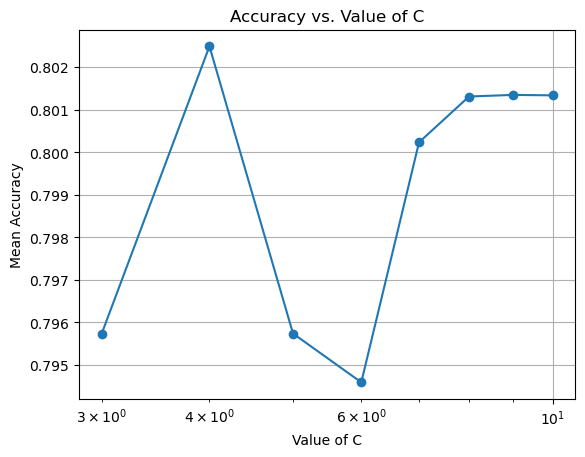

In [53]:
plt.plot(cv_values, mean_scores, marker='o')
plt.xscale('log')  
plt.xlabel('Value of C')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Value of C')
plt.grid(True)
plt.show()

In [54]:
#7.	Apply logistic regression on the split train/test dataset
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#df.columns

In [55]:
#8.	Compute your model’s accuracy using accuracy_score
accuracy=accuracy_score(y_pred, y_test)

In [56]:
accuracy

0.7877094972067039

In [57]:
cm=confusion_matrix(y_pred, y_test)

In [58]:
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

In [59]:
sensitivity

0.75

In [60]:
f1 = 2 * (sensitivity * accuracy) / (sensitivity + accuracy)

In [61]:
f1

0.7683923705722072